In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Описание данных

В качестве данных для ДЗ будем использовать данные по оттоку клиентов для Telco-Telecom 

In [2]:
df = pd.read_csv("data/Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Целевая переменная Churn имеет 2 значения
- No - клиент продолжил пользоваться услугами
- Yes - клиент отказался пользоваться услугами

In [4]:
TARGET_COL = "Churn"

In [5]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Признаки в данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Заметим что TotalCharges имеет тип object

In [8]:
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: x if x != " " else "0")

In [9]:
df["TotalCharges"] = df["TotalCharges"].astype(np.float64)

- customerID - ID клиента в системе
- gender - пол клиента
- SeniorCitizen - является пенсионером
- Partner - является партнером
- Dependents - является иждивенцем
- tenure - срок владения подпиской
- PhoneServices - подключены сервисы телефонии
- MultipleLines - подключено несколько линий
- InternetService - подключены сервисы интернета
- OnlineSecurity - подключен защита в интернете
- OnlineBackup - подключено восстановление данных
- DeviceProtection - подключена защита устройства
- TechSupport - обращался ли в поддержку
- StreamingTV - подключено телевидение
- StreamingMovies - подключен онлайн кинотеатр
- Contract - тип контракта
- PaperlessBilling - безналичная оплата
- PaymentMethod - тип оплаты
- MonthlyCharges - месячный платеж
- TotalCharges - всего уплочено

In [10]:
CAT_COLS = [
   'gender', 'SeniorCitizen', 'Partner', 'Dependents',
   'PhoneService', 'MultipleLines', 'InternetService',
   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
   'PaymentMethod'
]

In [11]:
REAL_COLS = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Распределения

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

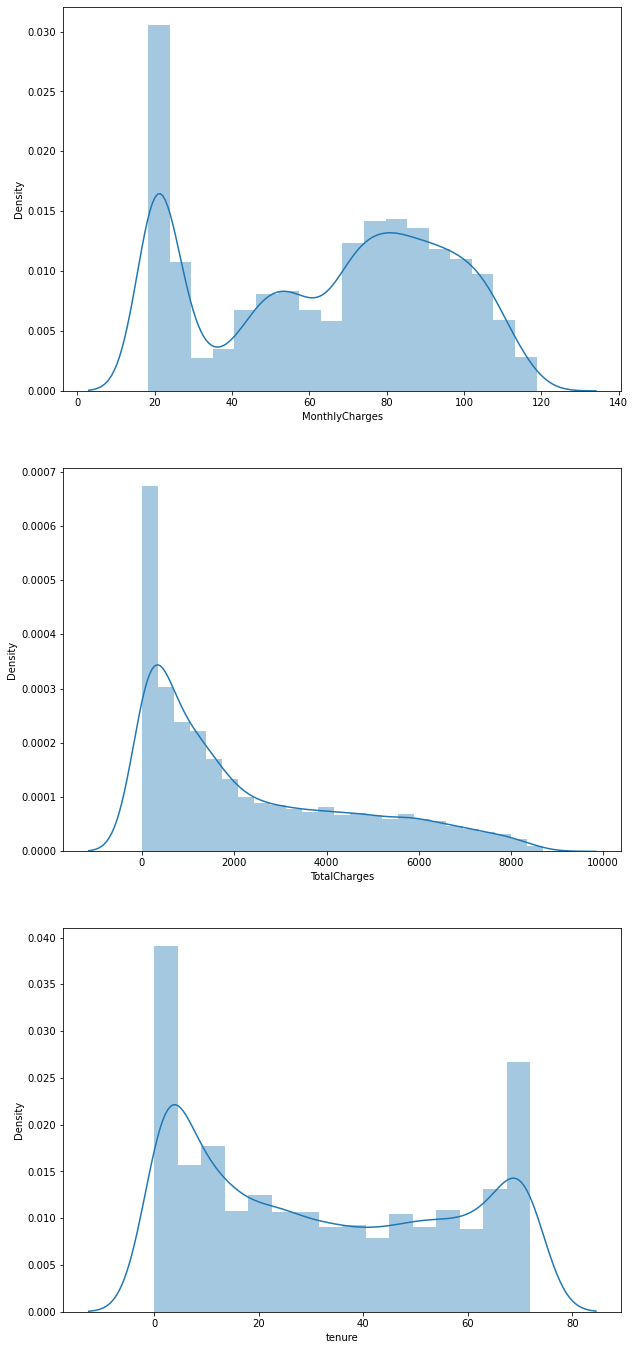

In [33]:
fig, ax = plt.subplots(3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(REAL_COLS):
    sns.distplot(df[col], ax=ax[i])

Наблюдается несколько мод в tenure и monthly charges

# Категориальные признаки

In [12]:
len(CAT_COLS)

16

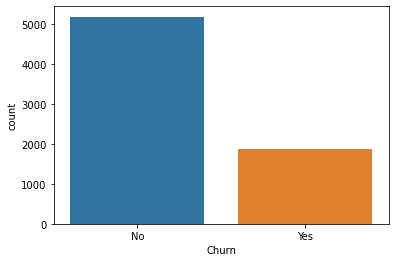

In [13]:
sns.countplot(x=TARGET_COL, data=df);

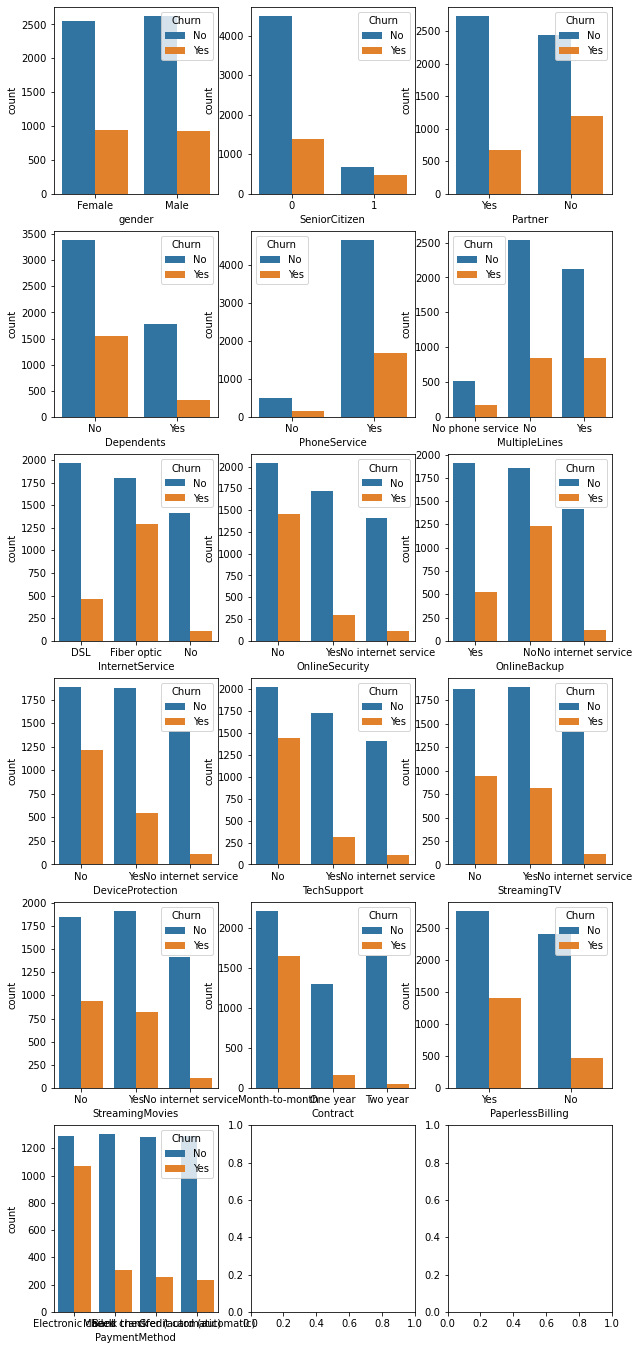

In [14]:
fig, ax = plt.subplots(6, 3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 3
    col_id = i % 3
    sns.countplot(x=col, hue=TARGET_COL, data=df, ax=ax[row_id, col_id])

In [15]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
condition = df["PaymentMethod"] == 'Electronic check'

In [17]:
data_size = df.shape[0]

Лучшим признаком выглядит Payment Method

In [18]:
df["Churn"].value_counts() / data_size

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [19]:
condition_size = df.loc[condition].shape[0]
no_condition_size = df.loc[~condition].shape[0]

In [20]:
df.loc[condition, "Churn"].value_counts() / condition_size

No     0.547146
Yes    0.452854
Name: Churn, dtype: float64

In [21]:
df.loc[~condition, "Churn"].value_counts() / no_condition_size

No     0.829414
Yes    0.170586
Name: Churn, dtype: float64

Введем предположение что пользователь не отписывается если способ платежа не электронный чек и рассмотрим вторую часть

In [22]:
electro = df.loc[condition]

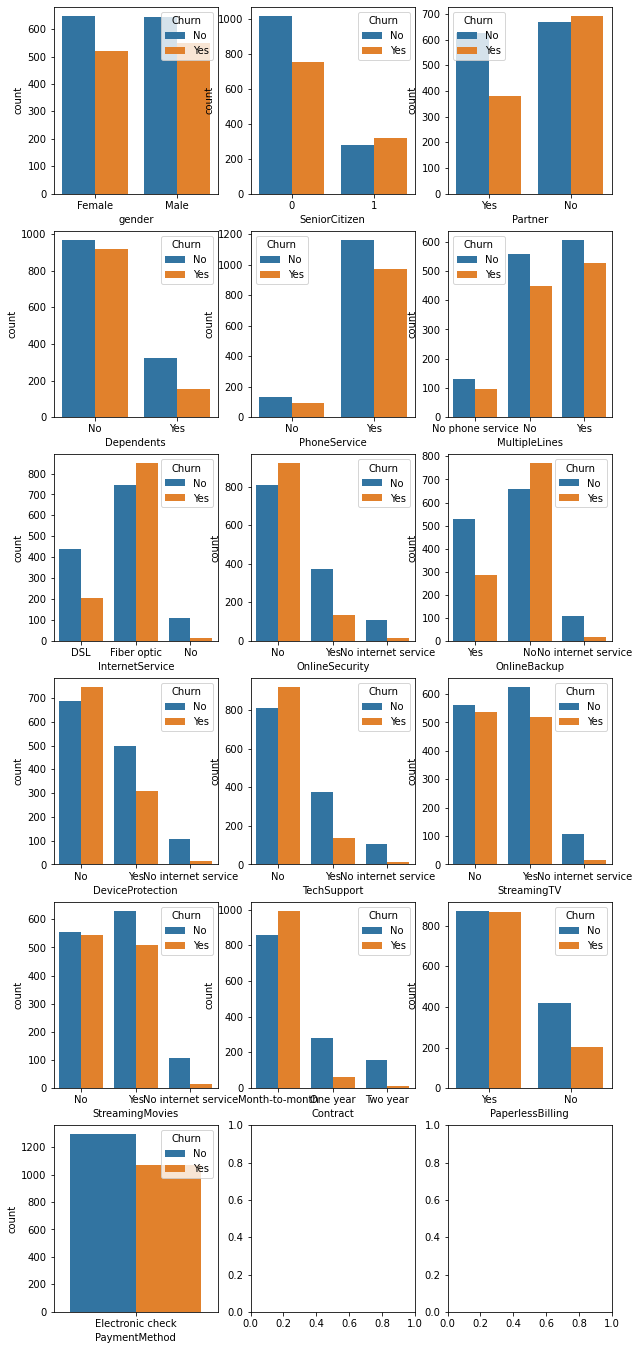

In [23]:
fig, ax = plt.subplots(6, 3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 3
    col_id = i % 3
    sns.countplot(x=col, hue=TARGET_COL, data=electro, ax=ax[row_id, col_id])

Ярко выраженных признаков не видно

In [24]:
no_electro = df.loc[~condition]

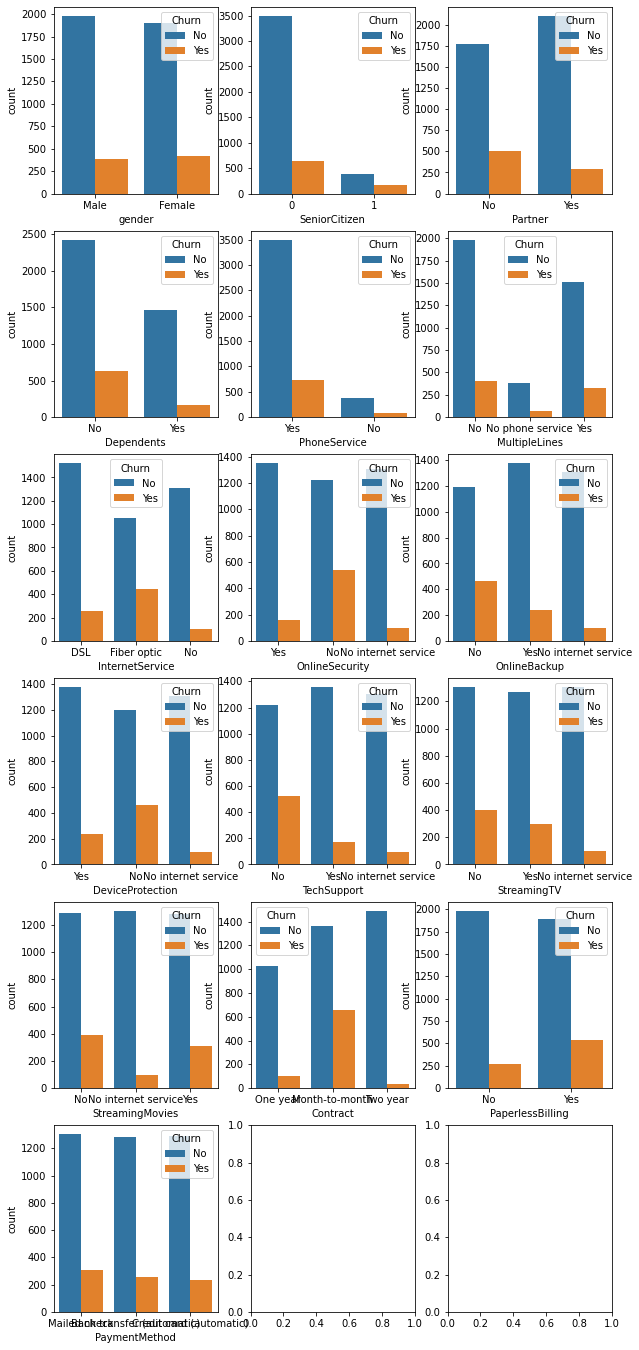

In [25]:
fig, ax = plt.subplots(6, 3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 3
    col_id = i % 3
    sns.countplot(x=col, hue=TARGET_COL, data=no_electro, ax=ax[row_id, col_id])

## Действительные признаки

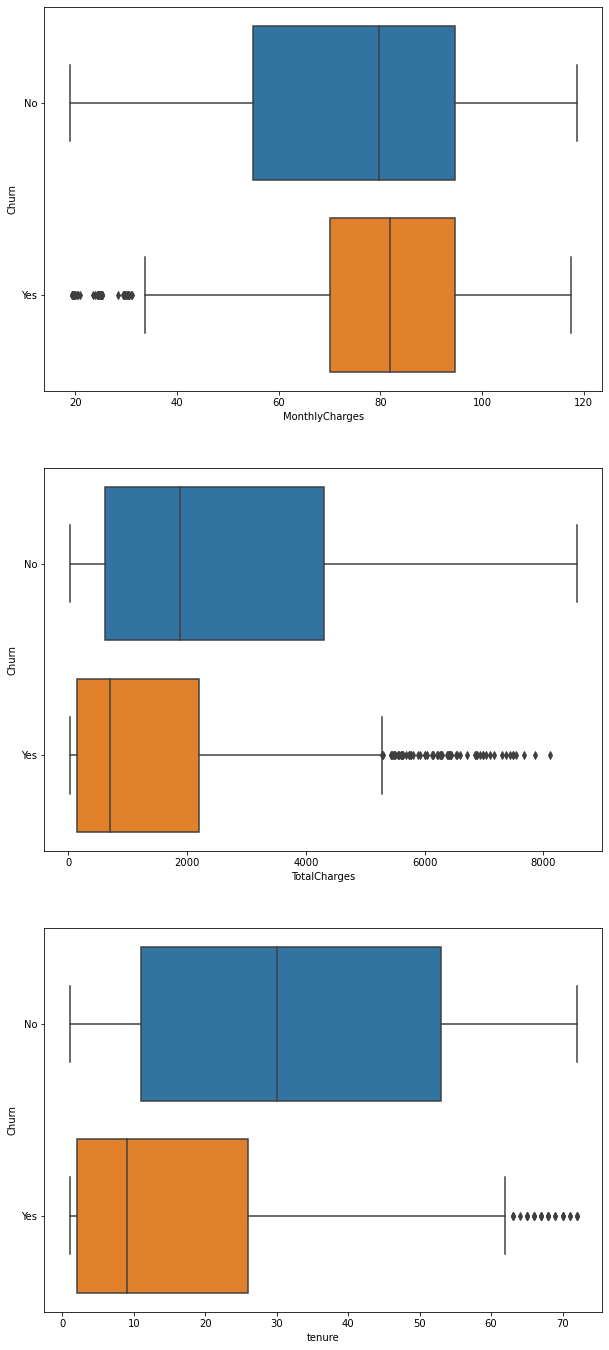

In [27]:
fig, ax = plt.subplots(3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(REAL_COLS):
    sns.boxplot(x=col, y=TARGET_COL, data=electro, ax=ax[i], orient="h")

In [34]:
condition = electro["tenure"] < 27

In [35]:
condition_size = electro.loc[condition].shape[0]
no_condition_size = electro.loc[~condition].shape[0]

In [36]:
electro.loc[condition, "Churn"].value_counts() / condition_size

Yes    0.576487
No     0.423513
Name: Churn, dtype: float64

In [38]:
electro.loc[~condition, "Churn"].value_counts() / no_condition_size

No     0.730325
Yes    0.269675
Name: Churn, dtype: float64

логарифмируем tenure

In [39]:
electro["tenure_log"] = np.log1p(electro["tenure"])

/tmp/ipykernel_3111037/2868860494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electro["tenure_log"] = np.log1p(electro["tenure"])


<AxesSubplot:xlabel='tenure_log', ylabel='Churn'>

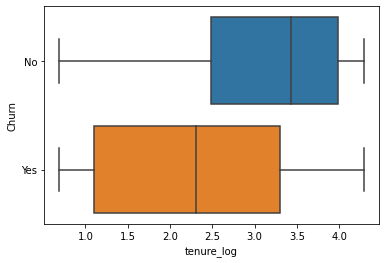

In [41]:
sns.boxplot(x="tenure_log", y=TARGET_COL, data=electro, orient="h")

In [42]:
condition = electro["tenure_log"] < 3.4

In [43]:
condition_size = electro.loc[condition].shape[0]
no_condition_size = electro.loc[~condition].shape[0]

In [44]:
electro.loc[condition, "Churn"].value_counts() / condition_size

Yes    0.570641
No     0.429359
Name: Churn, dtype: float64

In [45]:
electro.loc[~condition, "Churn"].value_counts() / no_condition_size

No     0.734136
Yes    0.265864
Name: Churn, dtype: float64

In [46]:
electro.loc[condition, "Churn"].value_counts()

Yes    828
No     623
Name: Churn, dtype: int64

In [48]:
electro.loc[condition, "Churn"].value_counts() / df["Churn"].value_counts()

No     0.120410
Yes    0.443018
Name: Churn, dtype: float64

Мы смогли выделить подможество где 44% от общего количество оттока и 12% тех кто остался

In [49]:
df["tenure_log"] = np.log1p(df["tenure"])

In [50]:
df["Prediction"] = "No"
df.loc[(df["PaymentMethod"] == 'Electronic check') & (df["tenure_log"] < 3.4), "Prediction"] = "Yes"

# Результат

In [51]:
pd.crosstab(df["Churn"], df["Prediction"])

Prediction,No,Yes
Churn,,
No,4551,623
Yes,1041,828


In [53]:
df.loc[df["Churn"] == df["Prediction"]].shape[0] / data_size

0.7637370438733494

Два признака дают 76% точности